In [7]:
!wget https://setup.johnsnowlabs.com/nlu/kaggle.sh  -O - | bash
! pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple peanut_butter_data_time==3.0.1rc63 > /dev/null 
# https://setup.johnsnowlabs.com/nlu/kaggle.sh 

import nlu

--2021-05-04 05:51:56--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/3.0.1rc1/scripts/kaggle_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1567 (1.5K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.53K  --.-KB/s    in 0s      

2021-05-04 05:51:57 (32.0 MB/s) - written to stdout [1567/1567]

setup Kaggle for PySpark 3.0.2 and Spark NLP 3.0.2
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u252-b09-1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u252-b09-1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Unable to fetch some archiv

In [8]:
import nlu
import pandas as pd
df = pd.read_csv('/kaggle/input/twitter-airline-sentiment/Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]


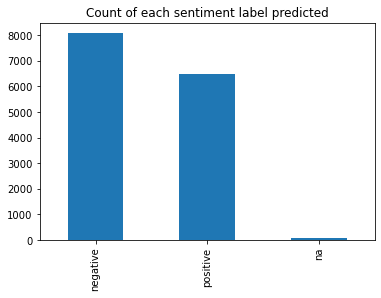

In [9]:
sentiment_predictions = nlu.load('sentiment').predict(df, output_level='document')
sentiment_predictions['sentiment'].value_counts().plot.bar(title='Count of each sentiment label predicted')

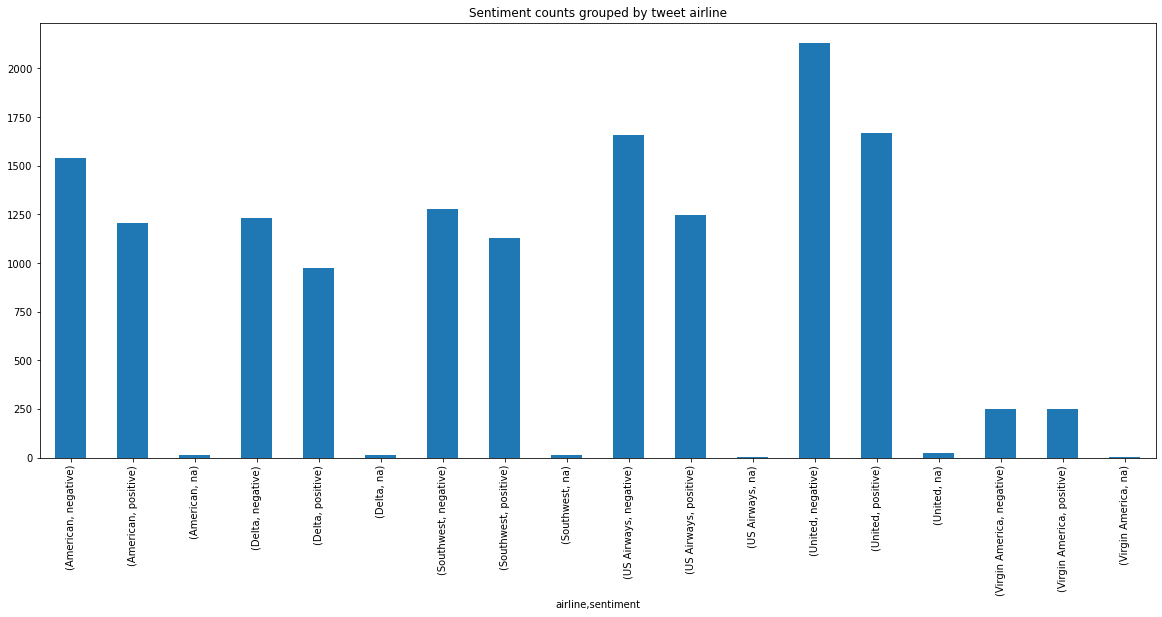

In [10]:
sentiment_predictions.groupby('airline')['sentiment'].value_counts().plot.bar(figsize=(20,8), title = 'Sentiment counts grouped by tweet airline')

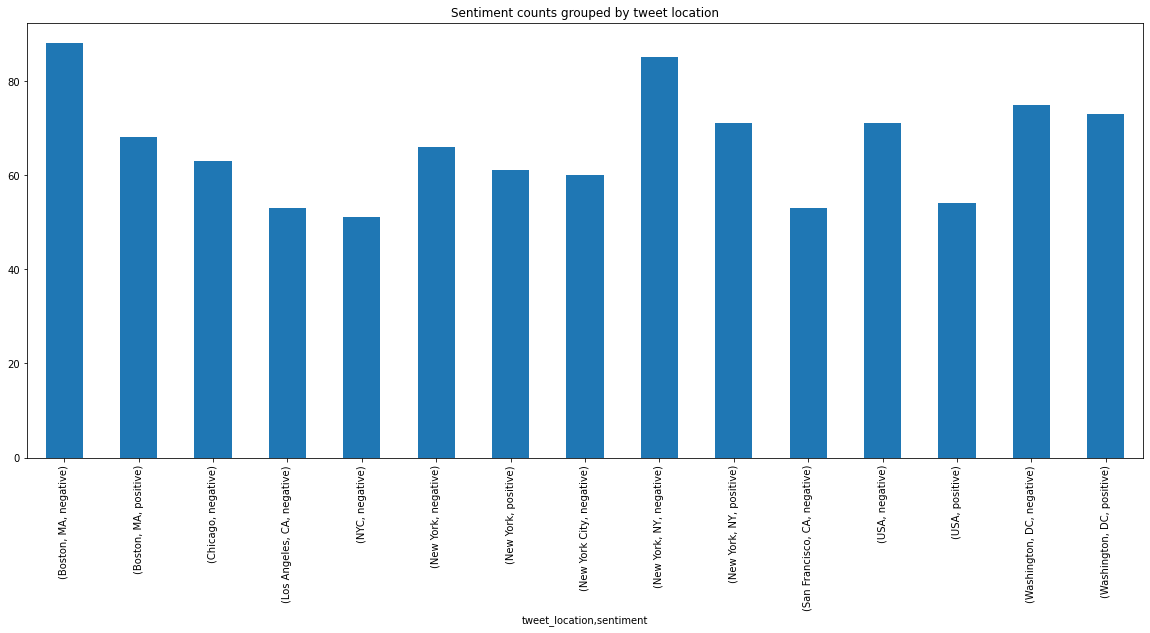

In [11]:
counts  = sentiment_predictions.groupby('tweet_location')['sentiment'].value_counts()

counts[counts>50].plot.bar(figsize=(20,8), title = 'Sentiment counts grouped by tweet location')

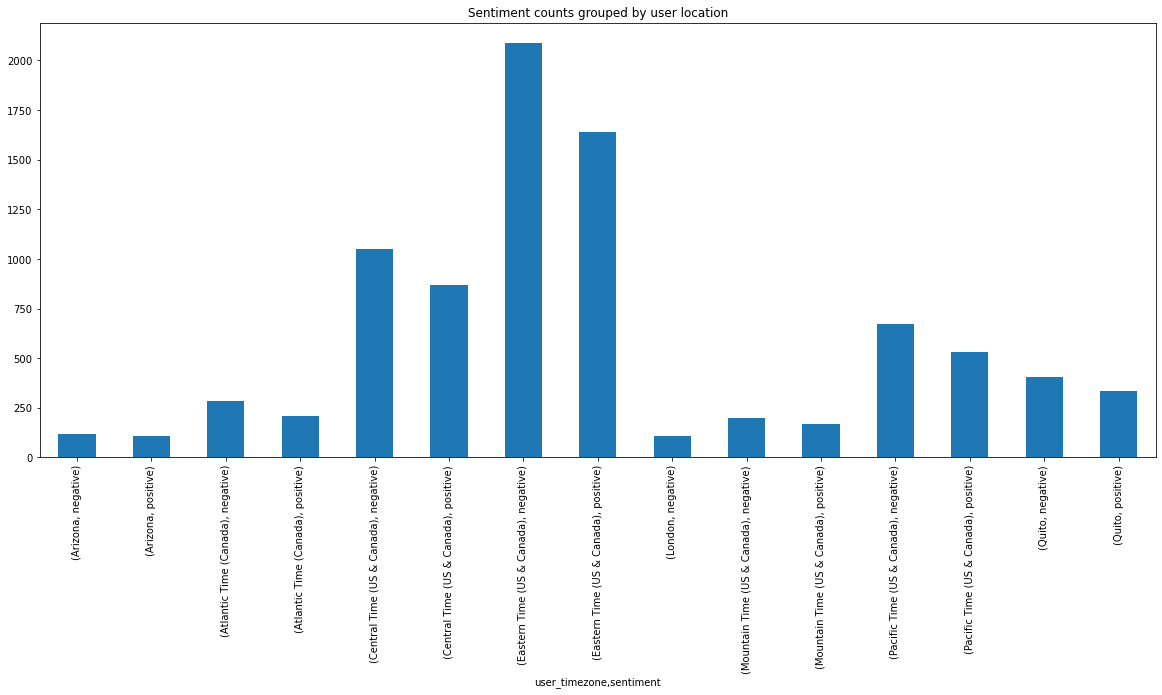

In [12]:
counts = sentiment_predictions.groupby('user_timezone')['sentiment'].value_counts()
counts[counts>100].plot.bar(figsize=(20,8), title='Sentiment counts grouped by user location')